In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
df=pd.read_csv("Fraud_check.csv")

In [3]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


# Rename Columns

In [4]:
df=df.rename(columns={'Marital.Status':'MaritalStatus','Taxable.Income':'TaxableIncome','City.Population':'CityPopulation','Work.Experience':'WorkExperience'})

In [5]:
df.shape

(600, 6)

In [6]:
label_encoder=preprocessing.LabelEncoder()
df['Undergrad']=label_encoder.fit_transform(df['Undergrad'])

In [7]:
label_encoder=preprocessing.LabelEncoder()
df['MaritalStatus']=label_encoder.fit_transform(df['MaritalStatus'])

In [8]:
label_encoder=preprocessing.LabelEncoder()
df['Urban']=label_encoder.fit_transform(df['Urban'])

In [9]:
df.head()

,Undergrad,MaritalStatus,TaxableIncome,CityPopulation,WorkExperience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Undergrad       600 non-null    int32
 1   MaritalStatus   600 non-null    int32
 2   TaxableIncome   600 non-null    int64
 3   CityPopulation  600 non-null    int64
 4   WorkExperience  600 non-null    int64
 5   Urban           600 non-null    int32
dtypes: int32(3), int64(3)
memory usage: 21.2 KB


In [11]:
df["Undergrad"].value_counts()

1    312
0    288
Name: Undergrad, dtype: int64

<AxesSubplot:>

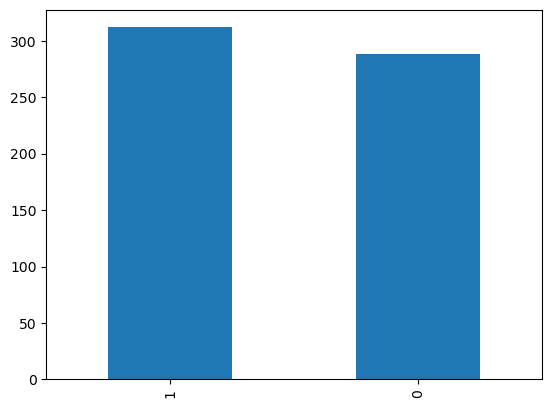

In [12]:
val_counts=df['Undergrad'].value_counts()
val_counts.plot.bar()

In [13]:
df["MaritalStatus"].value_counts()

2    217
1    194
0    189
Name: MaritalStatus, dtype: int64

<AxesSubplot:>

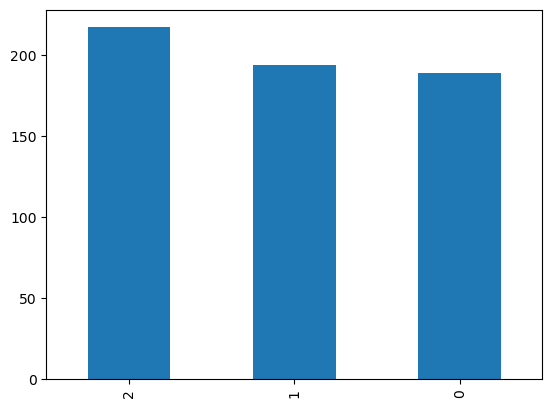

In [14]:
val_counts=df['MaritalStatus'].value_counts()
val_counts.plot.bar()

In [15]:
df["Urban"].value_counts()

1    302
0    298
Name: Urban, dtype: int64

<AxesSubplot:>

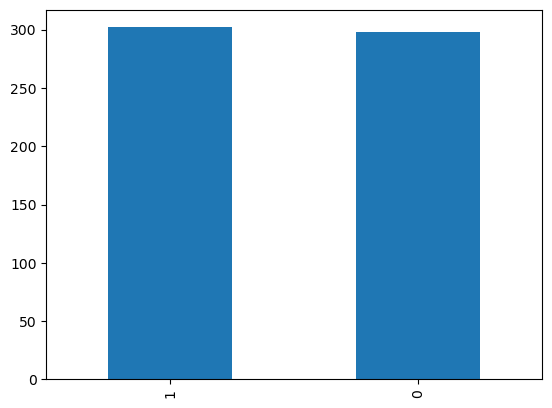

In [16]:
val_counts=df['Urban'].value_counts()
val_counts.plot.bar()

# Check for Duplicates

In [17]:
df[df.duplicated()].shape

(0, 6)

In [18]:
df[df.duplicated()]# No Duplicate values found

,Undergrad,MaritalStatus,TaxableIncome,CityPopulation,WorkExperience,Urban


# Outlier Detection and Cleaning

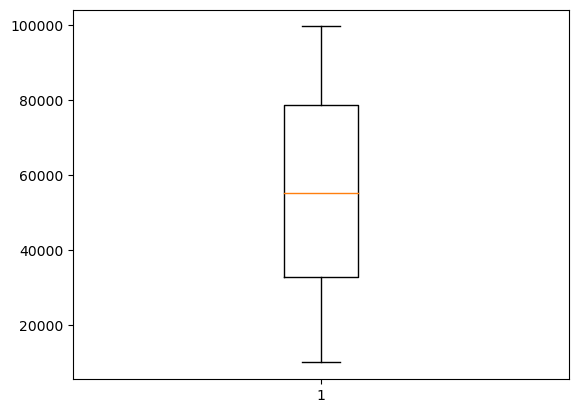

In [19]:
data_box=df.dropna()
data_box1=data_box.TaxableIncome
plt.boxplot(data_box1)
plt.show()


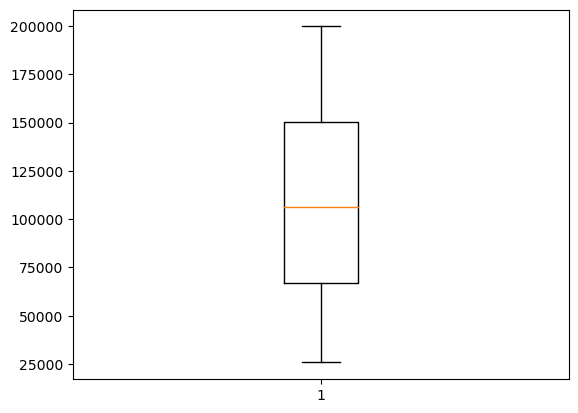

In [20]:
data_box=df.dropna()
data_box1=data_box.CityPopulation
plt.boxplot(data_box1)
plt.show()

In [21]:
#No Ouliers Present

In [22]:
df['TaxableIncome'] = pd.cut(df['TaxableIncome'], bins=[-1, 30000, float('inf')], labels=['Risky', 'Good'])
X = df.drop('TaxableIncome', axis=1)
y = df['TaxableIncome']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

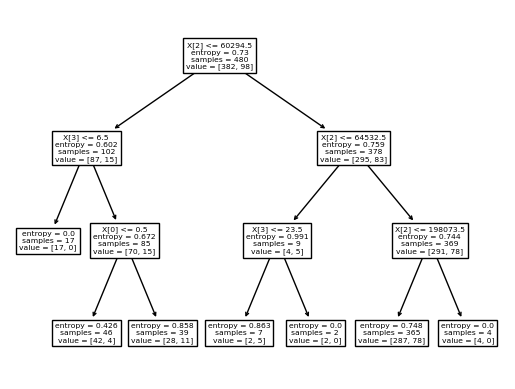

In [25]:
tree.plot_tree(model);

In [26]:
df.describe()

,Undergrad,MaritalStatus,CityPopulation,WorkExperience,Urban
count,600.000000,600.000000,600.000000,600.000000,600.000000
mean,0.520000,1.046667,108747.368333,15.558333,0.503333
std,0.500017,0.821958,49850.075134,8.842147,0.500406
min,0.000000,0.000000,25779.000000,0.000000,0.000000
25%,0.000000,0.000000,66966.750000,8.000000,0.000000
50%,1.000000,1.000000,106493.500000,15.000000,1.000000
75%,1.000000,2.000000,150114.250000,24.000000,1.000000
max,1.000000,2.000000,199778.000000,30.000000,1.000000


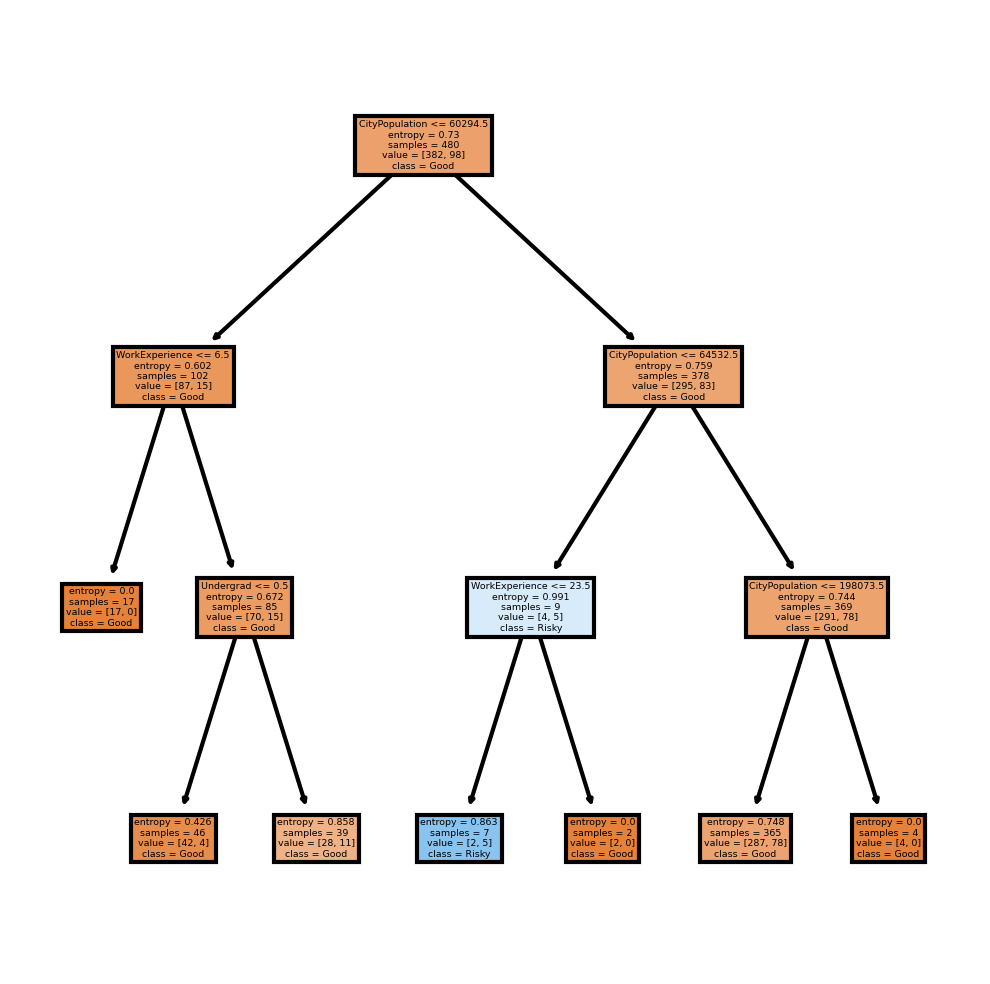

In [27]:
fn=['Undergrad','MaritalStatus','CityPopulation','WorkExperience','Urban']
cn=['Good', 'Risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [28]:
preds = model.predict(X_test) 
pd.Series(preds).value_counts()

Good     118
Risky      2
dtype: int64

In [29]:
preds

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
    

In [30]:
pd.crosstab(y_test,preds) 

col_0,Good,Risky
TaxableIncome,,
Risky,26,0
Good,92,2


In [31]:
df=pd.DataFrame()
df["Actual"]=y_test
df["Prediction"]=preds
df.reset_index(inplace=True,drop=True)

In [32]:
df

,Actual,Prediction
0,Risky,Good
1,Good,Good
2,Good,Good
3,Good,Good
4,Risky,Good
...,...,...
115,Good,Good
116,Good,Good
117,Good,Good
118,Good,Good


<AxesSubplot:>

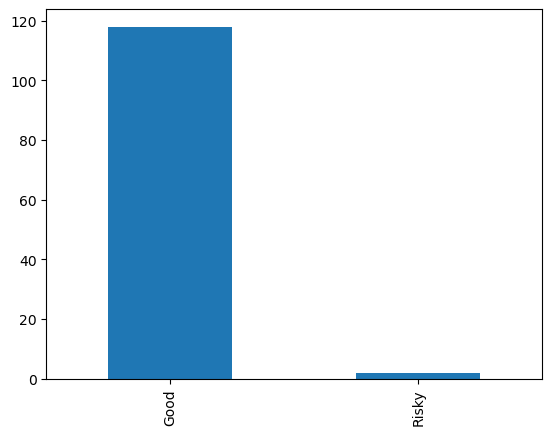

In [33]:
val_counts=df['Actual'].value_counts()
val_counts=df['Prediction'].value_counts()
val_counts.plot.bar()

In [34]:
from sklearn.metrics import classification_report
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

        Good       0.98      0.78      0.87       118
       Risky       0.00      0.00      0.00         2

    accuracy                           0.77       120
   macro avg       0.49      0.39      0.43       120
weighted avg       0.96      0.77      0.85       120



In [35]:
# Accuracy 
np.mean(preds==y_test)

0.7666666666666667